In [1]:
import sympy as sp

sp.init_printing(use_unicode=True)

In [2]:
# The number of arbitrageurs is set as exogenous variable N
y_eq, N, X, Y, P, gamma = sp.symbols(r"y_eq N X Y P \gamma")

We start with the case such that the number of arbitrageurs against the pool is exogenously set by $ N $. Let $ P $ be the price of external markets, such as CEXs, $ \gamma $ be the fee rate, $ X $ and $ Y $ be the reserves of pool. The spot price of pool is then $ \frac{Y}{X} $. Since we will take $ \gamma $ of both input and output token, effective fee rate will be around double of it. Letting $ (x_1, y_1), (x_2, y_2), \cdots , (x_N, y_N) $ be pair of each player's input amounts, the clearing price $ P_c $ will be following: 
$$
\begin{align} 
P_c = \frac{Y + 2\sum^N_{i=1} y_i }{X + 2\sum^N_{i=1} x_i} 
\end{align}
$$

Each player $ i $'s revenue $ R_i $ will be:
$$
R_i = -(1 + \gamma)(P x_i + y_i) + (1 - \gamma)(\frac{P}{P_c}y_i + P_c x_i)
$$

It is straight forward to see that the best response of $ i $ should be either $ (x_i, 0) $ or $ (0,y_i) $. WLOG let's assume $ \frac{1 - \gamma}{1 + \gamma}P > \frac{Y}{X} $ and each player's best response can be identified by $ y_i $.

From the first order condition, while $ P_{-i} $ is defined as clearing price without including bid from player $ i $, we have following equation:
$$
P_c = \sqrt{\frac{1 - \gamma}{1 + \gamma}P P_{-i}}
$$

Note that this holds for every $ i,j \in [N] $ thus
$$
P_c = \sqrt{\frac{1 - \gamma}{1 + \gamma}P P_{-i}} = \sqrt{\frac{1 - \gamma}{1 + \gamma}P P_{-j}},
$$
and the pure strategy Nash equilibrium is unique and symmetric.

Let $ y_\text{eq} $ be the equilibrium bid of each player. Then $ y_\text{eq} $ should satisfy:
$$
\frac{Y + 2Ny_\text{eq}}{X} = \sqrt{\frac{(Y + 2(N-1)y_\text{eq})}{X} \frac{(1-\gamma)}{(1+\gamma)}P}.

In [3]:
equation = (Y + 2 * N * y_eq) / X - sp.sqrt(
    (Y + 2 * (N - 1) * y_eq) / X * P * (1 - gamma) / (1 + gamma)
)

In [4]:
solution = sp.solve(equation, y_eq)[
    1
]  # We take the second solution, which is the positive one that makes sense

$ y_\text{eq} $ will be:

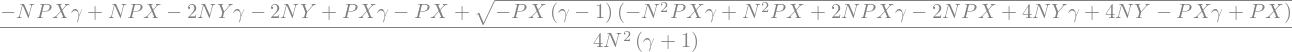

In [5]:
sp.simplify(solution)

Arbitrageur profit will be:

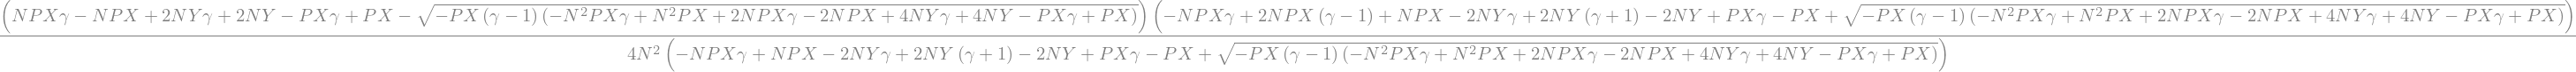

In [6]:
sp.simplify(
    -(1 + gamma) * solution + (1 - gamma) * P * solution / ((Y + 2 * N * solution) / X)
)

Total loss of AMM against arbitrageurs is:
$$
\begin{align}
\text{LVR} &= N \cdot (\text{Arbitrageurs' profit}) \\
&= N y_\text{eq} (1 + \gamma) \Big[\frac{1 - \gamma}{1 + \gamma} \frac{P}{P_c} - 1 \Big] \\ 
&= (1 - \gamma) \cdot P X \cdot \frac{1}{(1 + \frac{Y}{2N y_\text{eq}})^2} \cdot \frac{1}{2N} \\
\end{align} 
$$

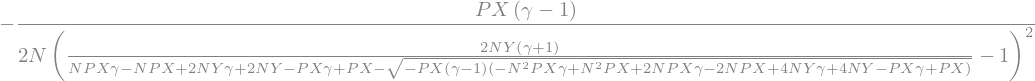

In [7]:
sp.simplify((1 - gamma) * P * X / (1 + Y / (2 * N * solution)) ** 2 / (2 * N))